## Introduction

This short notebook compares the accuracy of four classification models over a numeric set of data:
- Decission Trees
- Random Forest
- Support Vector Machine
- K Nearest Neighbors

The data set used is a cleaned up version of cardio_train.csv available at 
https://www.kaggle.com/sulianova/cardiovascular-disease-dataset
where a number of explicative features are used to predict the presence ("1") or absence ("0") of a cardiovascular disease (CARDIO_DISEASE).

An insightful graphical representation of the decision tree is also included.

Enjoy reading!


## Data analysis and clean up

I have done a bit of pre-processing with Excel before uploading the csv file into colab. Excel is still pretty convenient for correcting wrong data manually, as shown in the AP_HIGH shadowed column below where the minus sign has been removed.

Also, there were some outliers (mainly in the AP_HIGH and AP_LOW columns) and I have removed them.

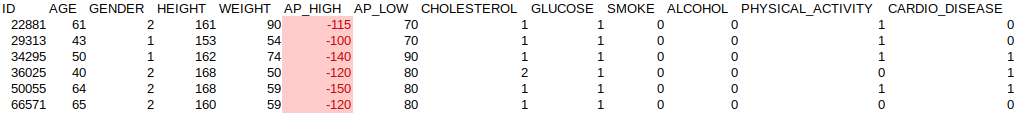

In [ ]:
# Start importing the required libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline

In [ ]:
# Upload data file into dataframe df
df = pd.read_csv("../input/cardio-data-dv13032020/cardiovascular_diseases_dv3.csv", sep=';')

df.info()
df.head()

In [ ]:
print(format(df.duplicated().sum())) # 3820 duplicates???

In [ ]:
# Explore duplicates
duplicated = df[df.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['AGE', 'GENDER', 'HEIGHT'], ascending= False) 
# I sorted the values to see duplication clearly

duplicated.head(6) # Show 3 duplicate pairs

In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)
print(format(df.duplicated().sum())) # now 0 duplicates???

In [ ]:
df.describe() # There are no negative values, nore ridiculous out of scale values

In [ ]:
# Distributions of age, height and weight variables
fig, axes = plt.subplots(1,3, figsize=(18,4))
sns.distplot(df.AGE, bins=10, kde=True, ax=axes[0])
sns.distplot(df.HEIGHT, bins=10, kde=True, ax=axes[1])
sns.distplot(df.WEIGHT, bins=10, kde=True, ax=axes[2])

In [ ]:
correlation = df.corr()

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

The most influential variables in having CARDIO_DISEASE are AGE, WEIGHT, CHOLESTEROL and primarily AP_HIGH and AP_LOW.

## Preparation of data for training models
The data set is first split into X (features) and y (target variable) components, and then randomly into train and test sub sets. 

In [ ]:
# Import train_test_split and divide data into X and y components
from sklearn.model_selection import train_test_split

y = df['CARDIO_DISEASE']
X = df.drop(['CARDIO_DISEASE'], axis=1, inplace=False)
X.head()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,                                
                                                    test_size = 0.25, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

## Decission Tree predictor

In [ ]:
# Import DecissionTree classification model from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

DT_predictor = DecisionTreeClassifier(max_depth=3, min_samples_split=50, min_samples_leaf=50, random_state=13)
DT_predictor.fit(X_train, y_train)
y_predicted = DT_predictor.predict(X_test)
y_predicted

In [ ]:
# Evaluate the model
print("------------------------------------------------------") 
print("Confussion Matrix")
print("------------------------------------------------------")
print(confusion_matrix(y_test,y_predicted))
print("------------------------------------------------------")
print("Classification Report")
print("------------------------------------------------------")
print(classification_report(y_test,y_predicted))
print("------------------------------------------------------")
DT_accuracy = round(accuracy_score(y_test, y_predicted), 2)
print("Overall accuracy score: " + str(DT_accuracy))
print("------------------------------------------------------")

In [ ]:
# Install pydotplus package into the kernel
!pip install pydotplus

In [ ]:
# Plot the Decission Tree model created with X_train, y_train
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus as pydot

dot_data = StringIO()

export_graphviz(DT_predictor, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names=X.columns,
                class_names=True,
                rotate=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Random Forest predictor

In [ ]:
# Import Random Forest classification model from sklearn
from sklearn.ensemble import RandomForestClassifier

RF_predictor = RandomForestClassifier(n_estimators=50, random_state=17)
RF_predictor.fit(X_train, y_train)
y_predicted = RF_predictor.predict(X_test)
y_predicted

In [ ]:
# Evaluate the model
print("------------------------------------------------------") 
print("Confussion Matrix")
print("------------------------------------------------------")
print(confusion_matrix(y_test,y_predicted))
print("------------------------------------------------------")
print("Classification Report")
print("------------------------------------------------------")
print(classification_report(y_test,y_predicted))
print("------------------------------------------------------")
RF_accuracy = round(accuracy_score(y_test, y_predicted), 2)
print("Overall accuracy score: " + str(RF_accuracy))
print("------------------------------------------------------")

## Support Vector Machine (SVM) predictor

In [ ]:
# Feature Scaling, required by SVM and KNN algorithms
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Import SVM classification model from sklearn
from sklearn.svm import SVC

SV_classifier = SVC(kernel='linear')
SV_classifier.fit(X_train, y_train)
y_predicted = SV_classifier.predict(X_test)
y_predicted

In [ ]:
# Evaluate the model
print("------------------------------------------------------") 
print("Confussion Matrix")
print("------------------------------------------------------")
print(confusion_matrix(y_test,y_predicted))
print("------------------------------------------------------")
print("Classification Report")
print("------------------------------------------------------")
print(classification_report(y_test,y_predicted))
print("------------------------------------------------------")
SV_accuracy = round(accuracy_score(y_test, y_predicted), 2)
print("Overall accuracy score: " + str(SV_accuracy))
print("------------------------------------------------------")

## K Nearest Neighbors predictor

In [ ]:
# Feature Scaling also needed, but already performed

In [ ]:
# Import KNN classification model from sklearn
from sklearn.neighbors import KNeighborsClassifier

KNN_classifier = KNeighborsClassifier(n_neighbors=25)
KNN_classifier.fit(X_train, y_train)
y_predicted = KNN_classifier.predict(X_test)
y_predicted

In [ ]:
# Evaluate the model
print("------------------------------------------------------") 
print("Confussion Matrix")
print("------------------------------------------------------")
print(confusion_matrix(y_test,y_predicted))
print("------------------------------------------------------")
print("Classification Report")
print("------------------------------------------------------")
print(classification_report(y_test,y_predicted))
print("------------------------------------------------------")
KNN_accuracy = round(accuracy_score(y_test, y_predicted), 2)
print("Overall accuracy score: " + str(KNN_accuracy))
print("------------------------------------------------------")

In [ ]:
# Compare accuracy of the four classification models
compare_scores = {'Decission Tree': DT_accuracy, 'Random Forest': RF_accuracy, 'Support Vector Machine (SVM)': SV_accuracy, 'K Nearest Neighbors (KNN)': KNN_accuracy}
compare_scores

End of notebook